# Sales and Order Analysis  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12

In [2]:
ecom_data_df = pd.read_parquet("../data/olist_ecom.parquet")

In [3]:
display(ecom_data_df.sample(1))
ecom_data_df.info()

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,time_to_approve,time_to_carrier,shipping_time,total_delivery_time,delivery_vs_estimate,Frequency,Monetary,Recency,R_score,F_score,M_score,RFM_score_string,RFM_score_composite,RFM_segment
3502,3502,f529a0fbe1ebd4622fb563b430cac7f5,90db37be54fd796a0fa73b7678e8b795,40150.0,salvador,BA,1263b5bd7d073c9196702d47117ee5fa,delivered,2017-12-03 08:03:22,2017-12-01 12:31:27,2017-12-05 13:09:45,2018-01-06 14:18:30,2018-01-02,1.0,credit_card,3.0,167.52,1.0,6eb6c5cb7df0f863538b61a47fcce962,fe2032dab1a61af8794248c8196565c9,2017-12-07 12:14:44,149.9,17.62,perfumaria,55.0,226.0,1.0,500.0,23.0,8.0,15.0,-1.813831,4.026597,32.047743,34.260509,4.596181,1,167.52,281,2,1,4,214,7,Single Buyers (Moderate R & High M)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7475 entries, 0 to 7474
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          7475 non-null   int64         
 1   customer_id                    7475 non-null   object        
 2   customer_unique_id             7475 non-null   object        
 3   customer_zip_code_prefix       6877 non-null   float64       
 4   customer_city                  7475 non-null   object        
 5   customer_state                 7475 non-null   object        
 6   order_id                       7475 non-null   object        
 7   order_status                   7475 non-null   object        
 8   order_purchase_timestamp       7475 non-null   datetime64[ns]
 9   order_approved_at              7475 non-null   datetime64[ns]
 10  order_delivered_carrier_date   7409 non-null   datetime64[ns]
 11  order_delivered_c

## Overall Sales Volume & Value
---
- what is the total order products?
- What is the total price and freight_value?
- What is the average order value (price + freight_value) per order?

In [ ]:
total_order = ecom_data_df["order_id"].nunique()
total_revenue = ecom_data_df["price"].sum()
total_freight_value = ecom_data_df["freight_value"].sum()
avg_order = ecom_data_df.groupby("price")["freight_value"].sum().mean()
total_sales = total_revenue + total_freight_value

In [26]:
print(f"total order products: {total_order:,.0f}")
print(f"total revenue sales: R$ {total_revenue:,.2f}")
print(f"total freight price: R$ {total_freight_value:,.2f}")
print(f"average order product price: R$ {avg_order:,.2f}")
print(f"total sales (price + freight price): R$ {total_sales:,.2f}")

total order products: 6,817
total revenue sales: R$ 914,077.08
total freight price: R$ 145,420.97
average order product price: R$ 93.46
total sales (price + freight price): R$ 1,059,498.05


## Monthly sales Trend

In [28]:
# Calculate the number of unique orders per month and year
monthly_orders = (
    ecom_data_df.groupby(ecom_data_df["order_purchase_timestamp"].dt.to_period("M"))[
        "order_id"
    ]
    .nunique()
    .reset_index()
)

# Rename the column for clarity from order_purchase_timestamp to order_period
monthly_orders.rename(
    columns={"order_purchase_timestamp": "order_period"}, inplace=True
)

# change the data type to str (for plotting)
monthly_orders["order_period"] = monthly_orders["order_period"].astype(str)

Make plot

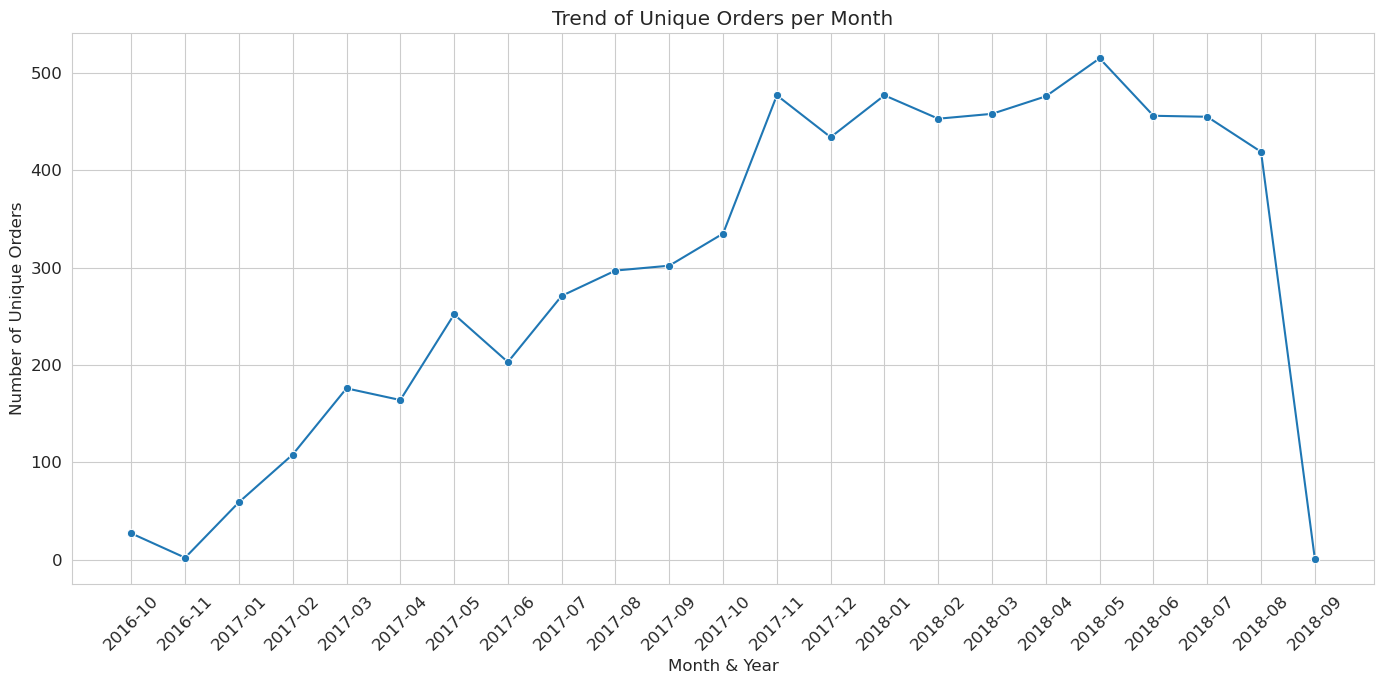

In [29]:
plt.figure(figsize=(14, 7))
sns.lineplot(x="order_period", y="order_id", data=monthly_orders, marker="o")
plt.title("Trend of Unique Orders per Month")
plt.xlabel("Month & Year")
plt.ylabel("Number of Unique Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()